In [76]:
import pgmpy as p
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.inference.ExactInference import BeliefPropagation

# Question 1

In [ ]:
bayesin_model = p.models.BayesianModel([('asia', 'tub'), ('tub', 'either'), ('either', 'xray'), ('either', 'dysp'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp')])

In [69]:
asia = p.factors.discrete.TabularCPD('asia', 2, [[0.01], [0.99]])
tub = p.factors.discrete.TabularCPD('tub', 2, [[0.05, 0.01], [0.95, 0.99]], ['asia'], [2])
smoke = p.factors.discrete.TabularCPD('smoke', 2, [[0.5], [0.5]])
lung = p.factors.discrete.TabularCPD('lung', 2, [[0.1, 0.01], [0.9, 0.99]], ['smoke'], [2])
bronc = p.factors.discrete.TabularCPD('bronc', 2, [[0.6, 0.3], [0.4, 0.7]], ['smoke'], [2])
either = p.factors.discrete.TabularCPD('either', 2, [[1, 1, 1, 0], [0, 0, 0, 1]], ['lung', 'tub'], [2, 2])
xray = p.factors.discrete.TabularCPD('xray', 2, [[0.98, 0.05], [0.02, 0.95]], ['either'], [2])
dysp = p.factors.discrete.TabularCPD('dysp', 2, [[0.9, 0.7, 0.8, 0.1], [0.1, 0.3, 0.2, 0.9]], ['bronc', 'either'], [2, 2])

bayesin_model.add_cpds(asia, tub, smoke, lung, bronc, either, xray, dysp)

# Moral Graph

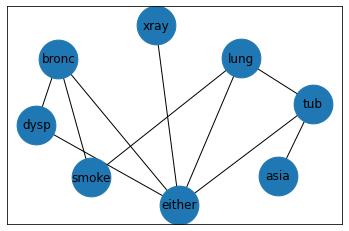

In [70]:
markov_model = bayesin_model.to_markov_model()
nx.draw_networkx(markov_model, with_labels=True, node_size=1500)

# Triangulated Graph

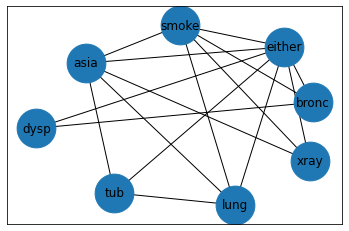

In [71]:
triangulated_model = markov_model.triangulate()
nx.draw_networkx(triangulated_model, with_labels=True, node_size=1500)

# Junction Tree

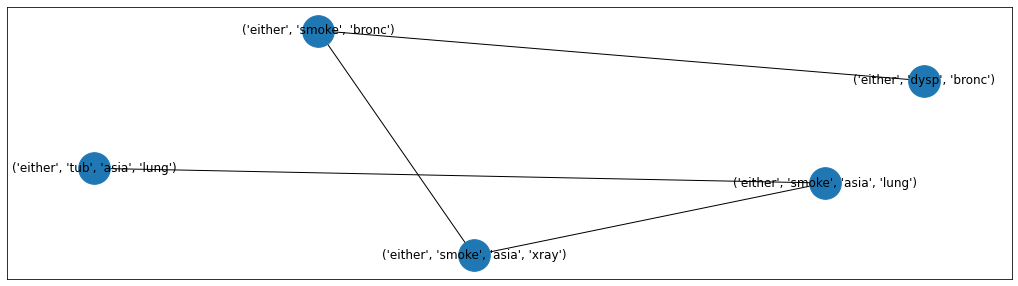

In [72]:
junction_model = bayesin_model.to_junction_tree()
plt.figure(figsize=(18,5)) 
nx.draw_networkx(junction_model, with_labels=True, node_size=1000)
plt.show()

# b)<br>
Running Intersection Property states that if a node appears in two cliques, it should also appear in all the nodes on the path that connect the two cliques. In the above displayed Junction Tree, we can see that every node that appears in any of the two cliques, is also present on the cliques connecting them. For example, the first and the last clique has node 'either' and hence all the cliques that connect them has 'either' as well.

# Question 2<br>
Clusters according to the junction tree:<br>
Node 1: either, tub, asia, lung<br>
Node 2: either, smoke, asia, lung<br>
Node 3: either, smoke, asia, xray<br>
Node 4: either, smoke, bronc<br>
Node 5: either, dysp, bronc<br>

In the message passing algorithm, we have a source cluster, an intervening sepset and a destination cluster. <br>For example, Node 1 ia the source, Node2, Node 3, Node 4 are the sepset and Node 5 is the destination.<br>

In order to send a message, we need a leaf node with an open end. In this case, Node 1 is considered to be a leaf node. <br>

for the nodes:<br>
$ψ (E, T, A, L) = p(e|t, l) p(t|a) p(a)$<br>
$ψ (E, S, A, L) = p(s) p(a) p(l|s)$<br>
$ψ (E, S, A, X) = p(s) p(a) p(x|e)$<br>
$ψ (E, S, B) = p(s) p(b|s)$<br>
$ψ (E, D, B) = p(d|e, b)$<br>

Iteration 1: <br>
From Node 1 to Node 2: <br>
$ψ (E, T, A, L)' = ψ (E, T, A, L) ∑ψ (E, S, A, L)$
<br><br>

Therefore,<br>
$∑_aψ (E, T, A, L)ψ (E, S, A, L)ψ (E, S, A, X)ψ (E, S, B)ψ (E, D, B) = P(A, T, X, D, B, L, S)$ <br>

Iteration 2: <br>
From Node 2 to Node 3<br>
$\sumψ (E, S, A, L)' = \sum p(s) p(a) p(x|e) ψ (E, S, A, X)$
<br>
$ψ (E, S, A, X)ψ (E, S, A, L)' = $ Marginal Probability
<br>Iteration 3: <br>
From Node 3 to Node 4<br>
<br>Iteration 4: <br>
From Node 4 to Node 5<br>
<br>Iteration 5: <br>
From Node 5 to Node 4<br>
<br>Iteration 6: <br>
From Node 4 to Node 3<br>
<br>Iteration 7: <br>
From Node 3 to Node 2<br>
<br>Iteration 8: <br>
From Node 2 to Node 1<br>

We will eventually have the marginals at the end of the message passing algorithm.


In [ ]:
belief_prop = BeliefPropagation(bayesin_model)
join_pro = belief_prop.query(variables=['tub', 'lung', 'bronc'], evidence={'asia':1, 'xray':1}, joint=False, show_progress=False)

In [83]:
print(join_pro['tub']*join_pro['lung']*join_pro['bronc'])

+--------+---------+----------+-----------------------+
| tub    | lung    | bronc    |   phi(tub,lung,bronc) |
+========+=========+==========+=======================+
| tub(0) | lung(0) | bronc(0) |                0.0000 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(0) | bronc(1) |                0.0000 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(0) |                0.0001 |
+--------+---------+----------+-----------------------+
| tub(0) | lung(1) | bronc(1) |                0.0001 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(0) |                0.0005 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(0) | bronc(1) |                0.0007 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(0) |                0.4424 |
+--------+---------+----------+-----------------------+
| tub(1) | lung(1) | bronc(1) |                0

As it is asked in the question that “tub=yes,
lung=yes,bronc=yes”,	given	evidence	that	“asia=yes,	xray=yes”.<br>
We take the last row with tub(1), lung(1) and bronc(1) and the evidence provided as asia(1) and xray(1) <br>
We get the joint probability as 0.5562

### References:<br>
- Lecure slides on graphical models
- Building Probabilistic Graphical
Models with Python
- Piazza
- https://networkx.org/documentation/
- https://github.com/eBay/bayesian-belief-networks/
- https://pgmpy.org/models/bayesiannetwork.html
- https://en.wikipedia.org/wiki/Moral_graph
- https://en.wikipedia.org/wiki/Joint_probability_distribution